## Setup

In [1]:
import os
import sys

root = os.path.dirname(os.getcwd())
sys.path.append(root)
sys.path.append(os.path.join(root, "src"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.synthetic_regularization import run
from src.utils.parser import Parser

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
palette = sns.color_palette("Set1")

In [5]:
opts = Parser.compare()
opts.n_exp = 100
opts.real_theta = 1.0
opts.majority_s = 0.8
opts.dml_net = 'LinearNet'
opts.sync_dml_net = 'LinearNet'

In our paper, [Coordinated Double Machine Learning](https://arxiv.org/abs/2206.00885) [1] we show how coordinating the residuals in training the two predictive models $\hat{m}(X)$ and $\hat{\ell}(X)$ may reduce the treatment effect estimation bias. Below is a short demonstration of increasing the hyperparameter $\gamma$ that weight the regularization term of these residuals (equations 8-9 in [1]).
The following code runs C-DML for various values of $\gamma$:

In [6]:
opts.real_theta = 1.0
opts.gammas = sorted([0.0, 1.5, 1.6, 1.7, 1.8, 1.9])
opts.n_gammas = len(opts.gammas)
results = run(opts)

running C-DML: 100%|██████████| 100/100 [03:56<00:00,  2.36s/it]


In [ ]:
palette_ = [palette[0]] + [palette[1] for _ in opts.gammas]
gammas_dict = {np.nan: 0.0}  # for DML
gammas_dict.update({gamma: (1.0 + i) for i, gamma in enumerate(opts.gammas)})
results["positions"] = results["gamma"].replace(to_replace=gammas_dict)

The code below visualizes the bias of DML and C-DML for these values of $\gamma$:

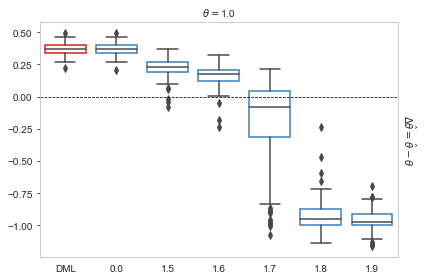

In [8]:
with sns.axes_style("whitegrid"):
    _, ax = plt.subplots(1, 1, figsize=(opts.n_gammas, 4))
    boxplots = sns.boxplot(
        data=results,
        x="positions",
        y="bias",
        palette=palette_,
        ax=ax,
        linewidth=1.5,
        boxprops=dict(facecolor="none"),
    )
    ax.set_title(r"$\theta=$" + str(1.0), fontsize=10)
    ax.axhline(y=0.0, linestyle="--", linewidth=0.75, color="black")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(visible=False)
    ax.set_xticklabels(["DML"] + [str(gamma) for gamma in opts.gammas])

    ax_twin = ax.twinx()
    ax_twin.set_ylabel(r"$\Delta \hat{\theta} = \hat{\theta} - \theta$", fontsize=10, rotation=270, labelpad=20)
    ax_twin.set_yticks([])
    ax_twin.set_yticklabels([])

    for box, c in zip(boxplots.artists, palette_):
        box.set_edgecolor(c)

plt.tight_layout()
plt.show();